In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('droppednulls.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      41365 non-null  int64  
 1   Unnamed: 0.1    41365 non-null  int64  
 2   Unnamed: 0.1.1  41365 non-null  int64  
 3   Country         41365 non-null  object 
 4   IDSTUD          41365 non-null  int64  
 5   ASBH02A         41365 non-null  object 
 6   ASBH02B         16131 non-null  object 
 7   ASBH03A         40775 non-null  object 
 8   ASBH04          26888 non-null  float64
 9   ASBH15A         23005 non-null  float64
 10  ASBH15B         20263 non-null  float64
 11  ASBH16          39885 non-null  float64
 12  ASBH17A         14850 non-null  float64
 13  ASBH17B         12612 non-null  float64
 14  ASBH18AA        25767 non-null  float64
 15  ASBH18AB        20840 non-null  float64
 16  ASBG01          29510 non-null  float64
 17  ASBG03          28438 non-null 

In [2]:
column_list = df.columns.to_list()
# Join the list into a single string separated by ', '
# Format each column name with quotes
formatted_columns = ', '.join(f"'{col}'" for col in column_list)

# Print the formatted string
print(formatted_columns)

'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J', 'ASDAGE', 'ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05', 'MINAGEARRIVAL', 'rounded_ages'


In [3]:
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [4]:
non_assessment_score_columns = ['Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [5]:
demographic_info_columns = ['Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages']

In [6]:
experience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [7]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pivot_df_multiplexreadingscore = df.pivot_table(values=assessment_score_columns, index=['Country','ASBH02A'], aggfunc='mean')
pivot_df_multiplexreadingscore

ASRIIE01    ASRIIE02    ASRIIE03    ASRIIE04  \
Country     ASBH02A                                                   
Austria     No       501.445941  497.509870  497.003904  496.295325   
            Yes      534.842244  533.711357  533.087264  533.433242   
Egypt       No       380.239904  378.807461  369.667864  377.573304   
            Yes      383.598790  382.061023  381.942312  382.036982   
France      No       492.222485  494.421637  491.149082  494.454796   
            Yes      519.154937  518.659499  515.988722  517.479324   
Germany     No       495.935817  490.531360  491.805816  489.016677   
            Yes      543.935603  542.591778  544.966501  542.813414   
Iran        No       417.073024  412.897435  416.829988  427.544190   
            Yes      422.136523  420.909042  419.610095  420.177299   
Jordan      No       383.733002  375.714243  374.378502  377.204224   
            Yes      367.755275  365.854429  365.727323  367.295610   
Netherlands No       526.675806  527.016343  525.465012  535.101524   
            Yes      546.208978  546.738919  545.371166  544.988483   
Sweden      No       512.892926  510.925293  509.233544  505.941694   
            Yes      564.196923  562.942955  562.461770  563.588740   
Turkey      No       450.445825  451.735093  447.627363  449.679310   
            Yes      505.533630  504.930404  504.895552  504.408851   

                       ASRIIE05    ASRINF01    ASRINF02    ASRINF03  \
Country     ASBH02A                                                   
Austria     No       494.574247  500.333160  494.273331  499.723737   
            Yes      532.600417  535.331423  534.577213  531.942602   
Egypt       No       374.640233  367.082532  369.437546  366.182946   
            Yes      382.639926  386.972019  385.327706  384.657786   
France      No       492.287022  493.849162  493.760551  492.339822   
            Yes      518.967871  521.589958  520.012538  519.322934   
Germany     No       490.896966  492.766537  493.463288  491.805468   
            Yes      543.985303  544.863606  544.844930  542.004172   
Iran        No       416.353756  419.129024  408.340931  416.119405   
            Yes      420.161405  423.846058  421.546140  421.215232   
Jordan      No       377.531259  386.042868  381.378578  382.541320   
            Yes      368.023493  374.900502  371.122153  370.127569   
Netherlands No       520.819109  542.177732  525.936900  534.985537   
            Yes      545.551738  547.616100  548.393485  547.057261   
Sweden      No       509.187560  516.297919  514.124534  511.310517   
            Yes      563.335753  564.927477  565.025216  564.746761   
Turkey      No       452.828048  462.506387  459.059504  458.804187   
            Yes      505.034311  509.563346  508.329178  508.026870   

                       ASRINF04    ASRINF05    ASRLIT01    ASRLIT02  \
Country     ASBH02A                                                   
Austria     No       499.841417  499.115395  500.635536  502.722567   
            Yes      534.115349  532.056350  538.361933  537.409325   
Egypt       No       370.542904  371.478147  368.676351  368.939148   
            Yes      384.202888  385.029868  376.685978  373.306229   
France      No       488.963355  486.909219  495.255217  500.683214   
            Yes      520.077588  521.102988  525.464446  523.994748   
Germany     No       498.663475  492.411113  499.489120  504.888491   
            Yes      543.192056  543.434294  553.564664  550.631064   
Iran        No       417.016444  417.540392  441.387932  436.967155   
            Yes      421.578555  421.015437  425.202467  423.014087   
Jordan      No       386.318845  387.073800  384.857957  382.228925   
            Yes      372.153357  371.678442  368.008948  365.351637   
Netherlands No       534.278011  536.517384  528.684011  522.660121   
            Yes      545.010293  544.470707  545.115229  545.443198   
Sweden      No       514.079147  513.192557  

In [22]:
pivot_df_multiplexreadingscore.columns

Index(['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRINF01',
       'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRLIT01', 'ASRLIT02',
       'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRREA01', 'ASRREA02', 'ASRREA03',
       'ASRREA04', 'ASRREA05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04',
       'ASRRSI05', 'Total'],
      dtype='object')

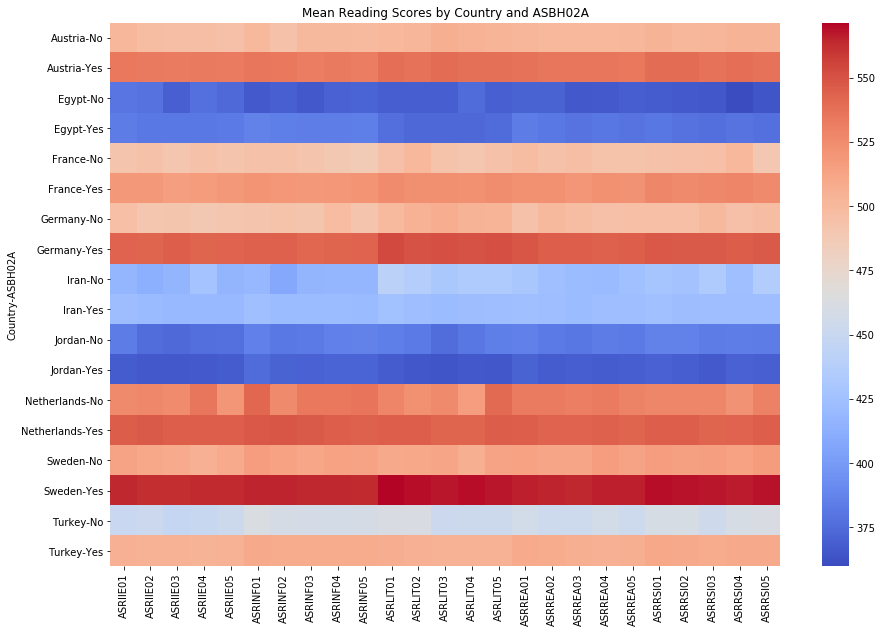

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(pivot_df_multiplexreadingscore, annot=False, cmap='coolwarm')  # Set annot=False to remove values
plt.title('Mean Reading Scores by Country and ASBH02A')
plt.show()

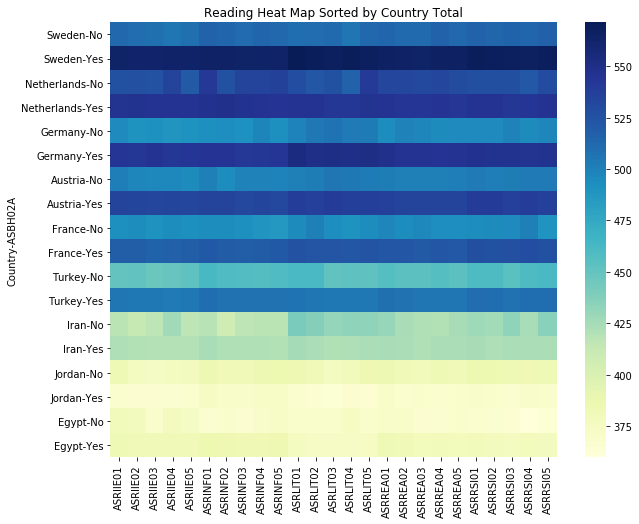

In [14]:
# Calculate row totals for sorting
pivot_df_multiplexreadingscore['Total'] = pivot_df_multiplexreadingscore.sum(axis=1)

# Calculate totals by country
country_totals_reading = pivot_df_multiplexreadingscore.groupby(level='Country').sum().sum(axis=1)

# Sort countries by total values
sorted_countries = country_totals_reading.sort_values(ascending=False).index

# Reindex the pivot table
sorted_pivot__reading_df = pivot_df_multiplexreadingscore.reindex(sorted_countries_reading, level='Country')

# Drop the Total column after sorting (if needed)
sorted_pivot__reading_df = sorted_pivot__reading_df.drop(columns='Total')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot__reading_df, annot=False, cmap='YlGnBu')
plt.title('Reading Heat Map Sorted by Country Total')
plt.show()

**I wonder if there is a way to sort within country so that the yesses are on top of the nos....**

In [12]:
# Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_df_multiplexreadingscore.index.to_frame()
print(index_df)

                         Country ASBH02A
Country     ASBH02A                     
Austria     No           Austria      No
            Yes          Austria     Yes
Egypt       No             Egypt      No
            Yes            Egypt     Yes
France      No            France      No
            Yes           France     Yes
Germany     No           Germany      No
            Yes          Germany     Yes
Iran        No              Iran      No
            Yes             Iran     Yes
Jordan      No            Jordan      No
            Yes           Jordan     Yes
Netherlands No       Netherlands      No
            Yes      Netherlands     Yes
Sweden      No            Sweden      No
            Yes           Sweden     Yes
Turkey      No            Turkey      No
            Yes           Turkey     Yes


In [21]:
index_df.columns

Index(['Country_', 'ASBH02A_'], dtype='object')

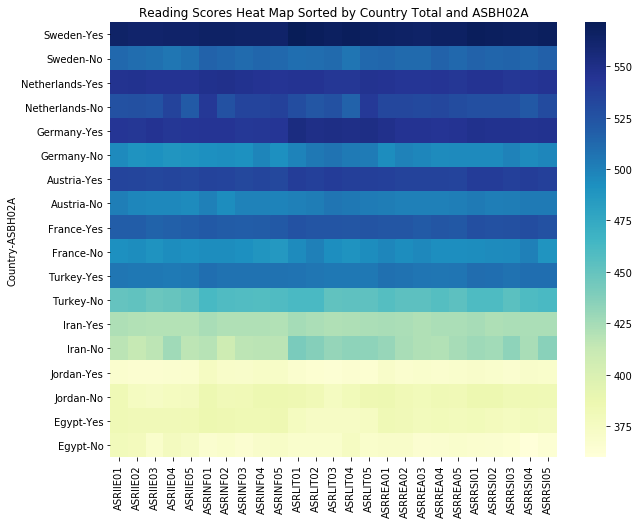

In [19]:
# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries, ordered=True)
index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_', 'ASBH02A_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_df_multiplexreadingscore.loc[index_df.index]

# Drop the Total column after sorting (if needed)
sorted_pivot_df = sorted_pivot_df.drop(columns='Total')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=False, cmap='YlGnBu')
plt.title('Reading Scores Heat Map Sorted by Country Total and ASBH02A')
plt.show()
